In [1]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

# Menyiapkan Dataset yang digunakan

In [2]:
# Upload semua dataset yang dipakai
for dirname, _, filenames in os.walk('Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset/list_wisata.csv
Dataset/list_wisata_db.csv
Dataset/rating.csv
Dataset/rating2.csv
Dataset/rating_fe.csv
Dataset/users.csv
Dataset/.ipynb_checkpoints\list_wisata-checkpoint.csv
Dataset/.ipynb_checkpoints\rating-checkpoint.csv
Dataset/.ipynb_checkpoints\Tempat_Wisata_Bali_Baru-checkpoint.csv
Dataset/.ipynb_checkpoints\user-checkpoint.csv
Dataset/.ipynb_checkpoints\users-checkpoint.csv


# Data Understanding

## Menyiapkan Data

In [3]:
# Menyimpan masing-masing dataset kedalam variabel

rating = pd.read_csv('Dataset/rating_fe.csv')
place = pd.read_csv('Dataset/list_wisata_db.csv', delimiter=',')
#user = pd.read_csv('Dataset/users.csv')

In [17]:
place.columns=["id_wisata","place_name"]

Keterangan:
place - mengandung informasi tempat wisata bali baru
user - mengandung informasi pengguna untuk membuat rekomendasi fitur berdasar pengguna
rating - mengandung informasi pengguna, tempat wisata, dan rating untuk membuat sistem rekomendasi berdasar rating

## Eksplorasi Fitur-fitur pada Data

### Data rating

In [4]:
rating.head()

,id_user,id_wisata,rating
0,1004,101,4.0
1,1004,102,5.0
2,1004,103,4.0
3,1004,104,5.0
4,1004,105,3.0


In [5]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_user    134 non-null    int64  
 1   id_wisata  134 non-null    int64  
 2   rating     134 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.3 KB


In [99]:
rating['id_user'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [96]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id_user    10001 non-null  int64
 1   id_wisata  10001 non-null  int64
 2   rating     10001 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [97]:
# cek null value
rating.isnull().values.any()

False

### Data place

In [13]:
place

,id_wisata,place_name
0,101,Danau Toba
1,102,Pantai Tanjung Kelayang
2,103,Pantai Tanjung Lesung
3,104,Pulau Seribu
4,105,Candi Borobudur
5,106,Taman Nasional Bromo Tengger Semeru
6,107,Pantai Kuta Mandalika
7,108,Labuan Bajo
8,109,Wakatobi
9,110,Morotai


In [18]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_wisata   10 non-null     int64 
 1   place_name  10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [100]:
place.isnull().values.any()

False

In [19]:
place['id_wisata'].unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110], dtype=int64)

### Data user

In [101]:
user.head()

,id_user,email,username,password
0,1,user1@gmail.com,user1,$2y$10$Z0d.qCn3uAWbJpKvoezQlOoWFmMGmYgwkspmzhv...
1,2,email@email.com,u1,$2y$10$kwXsI6OIOMwc0yBMRLaSPOCTHw/VZFsElIG9IWi...


In [102]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_user   2 non-null      int64 
 1   email     2 non-null      object
 2   username  2 non-null      object
 3   password  2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes


In [103]:
user.isnull().values.any()

False

# EDA

In [32]:
top_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        5 non-null      int64 
 1   id_wisata_x  5 non-null      int64 
 2   id_wisata_y  5 non-null      int64 
 3   place_name   5 non-null      object
dtypes: int64(3), object(1)
memory usage: 200.0+ bytes


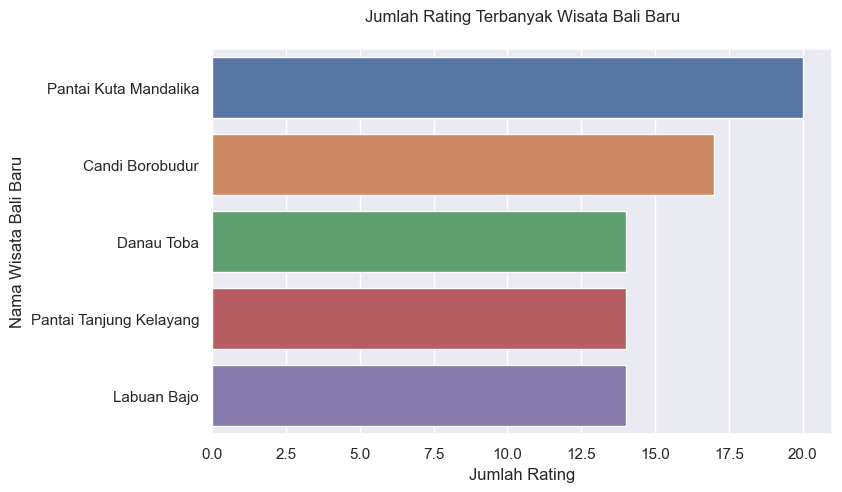

In [35]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_5 = rating['id_wisata'].value_counts().reset_index()[0:5]
top_5 = pd.merge(top_5, place[['id_wisata','place_name']], how='left', left_on='index', right_on='id_wisata')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
# sns.barplot('id_wisata_x', 'place_name', data=top_5)
sns.barplot(data=top_5, x="id_wisata_x", y="place_name")
plt.title('Jumlah Rating Terbanyak Wisata Bali Baru', pad=20)
plt.xlabel('Jumlah Rating')
plt.ylabel('Nama Wisata Bali Baru')
plt.show()

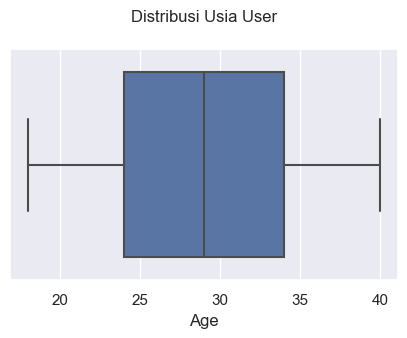

In [14]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

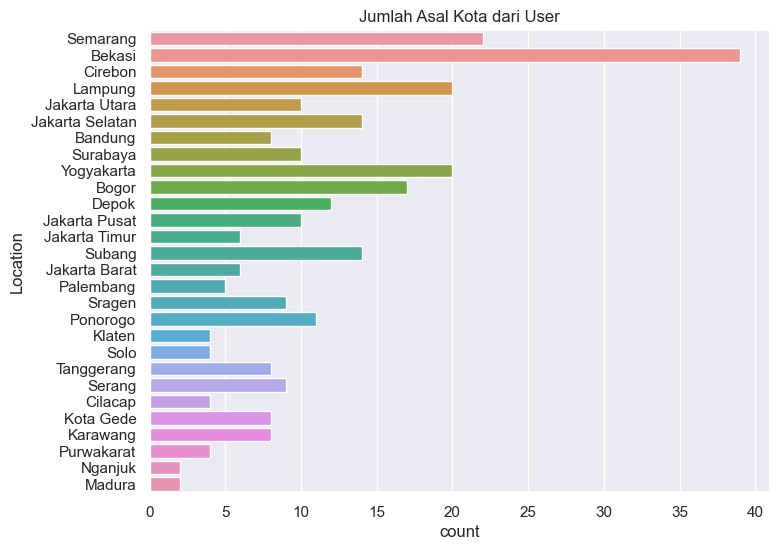

In [15]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

# Persiapan Data untuk Pemodelan

## Membuat Salinan Data rating

In [107]:
# Membaca dataset untuk dilakukan encoding
 
df = rating.copy()
df.head()

,id_user,id_wisata,rating
0,1,105,3
1,1,102,2
2,1,103,5
3,1,105,3
4,1,104,4


## Melakukan Encoding

In [108]:
# Membuat Fungsi untuk Melakukan Encoding
def dict_encoder(col, data=df):
    # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
    unique_val = data[col].unique().tolist()

    # Melakukan encoding value kolom suatu dataframe ke angka
    val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

    # Melakukan proses encoding angka ke value dari kolom suatu dataframe
    val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
    
    return val_to_val_encoded, val_encoded_to_val

In [109]:
#Encoding dan Mapping Kolom User

# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('id_user')

# Mapping User_Id ke dataframe
df['user'] = df['id_user'].map(user_to_user_encoded)

In [110]:
# Encoding dan Mapping Kolom Place

# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('id_wisata')

# Mapping Place_Id ke dataframe place
df['place'] = df['id_wisata'].map(place_to_place_encoded)

## Melihat Gambaran Data untuk Pemodelan

In [111]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['rating']), max(df['rating'])
 
print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 301, Number of Place: 10, Min Rating: 1.0, Max Rating: 5.0


In [112]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

# Menyiapkan Model

In [113]:
# Membuat Class fungsi Model
class RecommenderNet(tf.keras.Model):
    # Insialisasi fungsi
    def __init__(self, num_users, num_places, embedding_size=16, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        num_users += 100
        self.num_users = num_users
        self.num_places = num_places
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
        self.places_embedding = layers.Embedding( # layer embeddings places
            num_places,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
        places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
        places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4
 
        dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
        x = dot_user_places + user_bias + places_bias
    
        return tf.nn.sigmoid(x) # activation sigmoid
    
    def get_config(self):
        return {
            "num_users": self.num_users,
            "num_places": self.num_places,
            "embedding_size": self.embedding_size,
        }
    #class method is called when model is loaded
    @classmethod
    def from_config(cls, config):
        #number of users, number of shows, embedding size
        #used when creating the model
        return cls(num_users, num_places)

In [114]:
num_users

301

In [115]:
num_place

10

In [116]:
model = RecommenderNet(num_users, num_place) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [117]:
# Membuat Class fungsi Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_root_mean_squared_error')<0.25):
            print('Lapor! Metriks validasi sudah sesuai harapan')
            self.model.stop_training = True

In [118]:
# Training Model
history = model.fit(x = x_train,
                    y = y_train,
                    batch_size=3,
                    epochs = 50,
                    verbose=1,
                    validation_data = (x_val, y_val),
                    callbacks = [myCallback()]
                   )

Epoch 1/50
2667/2667 [==============================] - 12s 4ms/step - loss: 0.6964 - root_mean_squared_error: 0.3450 - val_loss: 0.6938 - val_root_mean_squared_error: 0.3560
Epoch 2/50
2667/2667 [==============================] - 8s 3ms/step - loss: 0.6893 - root_mean_squared_error: 0.3399 - val_loss: 0.6941 - val_root_mean_squared_error: 0.3562
Epoch 3/50
2667/2667 [==============================] - 8s 3ms/step - loss: 0.6836 - root_mean_squared_error: 0.3358 - val_loss: 0.6941 - val_root_mean_squared_error: 0.3562
Epoch 4/50
2667/2667 [==============================] - 8s 3ms/step - loss: 0.6802 - root_mean_squared_error: 0.3332 - val_loss: 0.6943 - val_root_mean_squared_error: 0.3563
Epoch 5/50
2667/2667 [==============================] - 8s 3ms/step - loss: 0.6802 - root_mean_squared_error: 0.3332 - val_loss: 0.6943 - val_root_mean_squared_error: 0.3564
Epoch 6/50
2667/2667 [==============================] - 8s 3ms/step - loss: 0.6761 - root_mean_squared_error: 0.3302 - val_loss: 

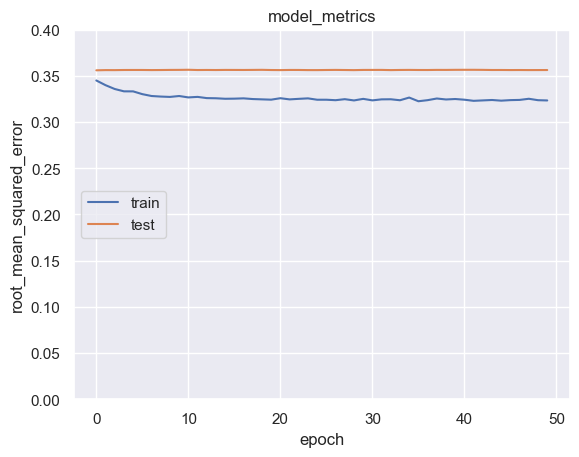

In [119]:
# Menampilkan plot loss dan validation
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

In [120]:
#save model
model.save_weights('model_checkpoint/model_weights', save_format='tf')

In [31]:
loaded_model = RecommenderNet(num_users, num_place)
loaded_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001))
loaded_model.load_weights('model_checkpoint/model_weights')

In [32]:
# Menyiapkan dataframe
place_df = place[['Place_Id','Place_Name','Category','Rating']]
place_df.columns = ['id','place_name','category','rating']
df = rating.copy()

In [68]:
# Mengambil sample user
user_id = df.User_Id.sample(8).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [69]:
len(df)

10000

In [70]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [71]:
place_not_visited

[[5]]

In [72]:
user_encoder

262

In [73]:
user_place_array

array([[262,   5]])

In [74]:
# Mengambil top 7 recommendation
ratings = loaded_model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata dari user')
print('----' * 15)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=True
    )
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category, ':', row.rating)

print('')
print('----' * 15)
print('Place recommendation')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,10)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

1/1 [==============================] - 0s 162ms/step
Daftar rekomendasi untuk: User 263

------------------------------------------------------------
Tempat dengan rating wisata dari user
------------------------------------------------------------
Danau Toba : Tempat Wisata : 4,5
Pantai Tanjung Kelayang : Tempat Wisata : 4,5
Pantai Tanjung Lesung : Tempat Wisata : 4
Pulau Seribu : Tempat Wisata : 4
Candi Borobudur : Tempat Wisata : 4,5
Pantai Mandalika : Tempat Wisata : 4
Labuan Bajo : Tempat Wisata : 5
Wakatobi : Tempat Wisata : 3,5
Murotai : Tempat Wisata : 4,5

------------------------------------------------------------
Place recommendation
------------------------------------------------------------
1 . Taman Nasional Bromo Tengger Semeru 
     Tempat Wisata , Rating Wisata  4,5 



In [ ]:
a=np.array([1,2])
print(a[[False, True]

In [1]:
# coba

In [55]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# from function import *

import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host="127.0.0.1",
                                          port=3306,
                                          user='root',
                                          # password='f#Ur8J3N',
                                          database='tour_in')
    if connection.is_connected():
        # db_Info = connection.get_server_info()
        # print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("SELECT * FROM rating_fe;")
        record = cursor.fetchone()
        raw_rating_fe = pd.read_sql_query(record, connection)  
        # rating_fe=raw_rating_fe[['kode_user','kode_wisata','rate_value']]
        # rating=rating_fe.columns = ['id_user','id_wisata', 'rating']
        print("query sukses")

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

# my_conn = mysql.connector.connect(host="127.0.0.1",
#                                   port=3306,
#                                   user='root',
#                                   # password='f#Ur8J3N',
#                                   database='tour_in')
# table_rating_fe= """
# SELECT * FROM rating_fe;
# """

rating=raw_rating_fe.copy()
rating_fe=raw_rating_fe[['kode_user','kode_wisata','rate_value']]
rating_fe.columns = [['id_user','id_wisata', 'rating']]
rating_fe.head()

Error while connecting to MySQL Unread result found


,id_user,id_wisata,rating
0,1,101,4.0
1,2,101,5.0
2,2,102,5.0
3,1,102,4.4
4,1,101,5.0


In [57]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host="127.0.0.1",
                                          port=3306,
                                          user='root',
                                          # password='f#Ur8J3N',
                                          database='tour_in')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("SELECT * FROM LIST_WISATA;")
        record = cursor.fetchone()
        raw_list_wisata = pd.read_sql_query(record, connection)
        #raw_list_wisata[['id_wisata','wisata']]
        #place=raw_list_wisata.columns = ['id','place_name']
        print("query sukses")

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

list_wisata=raw_list_wisata.copy()
place=list_wisata[['id_wisata','wisata']]
place.columns = ['id','place_name']
place.head()

Connected to MySQL Server version  5.5.5-10.4.25-MariaDB
Error while connecting to MySQL Unread result found


,id,place_name
0,101,Danau Toba
1,102,Pantai Tanjung Kelayang
2,103,Pantai Tanjung Lesung
3,104,Pulau Seribu
4,105,Candi Borobudur


In [118]:
def get_DataRating():
    my_conn = mysql.connector.connect(host="127.0.0.1",
                                        port=3306,
                                        user='root',
                                        # password='f#Ur8J3N',
                                        database='tour_in')
    query_insert="""
    SELECT * FROM rating_fe;
    """
    raw_rating_fe = pd.read_sql_query(query_insert, my_conn)
    return raw_rating_fe

In [180]:
ranting_fe=get_DataRating().copy()
rating=ranting_fe[['kode_user','kode_wisata','rate_value']]
rating.columns = [['id_user','id_wisata', 'rating']]
rating.to_csv('Dataset/rating_fe.csv', index=False)

In [120]:
def get_DataListWisata():
    my_conn = mysql.connector.connect(host="127.0.0.1",
                                        port=3306,
                                        user='root',
                                        # password='f#Ur8J3N',
                                        database='tour_in')
    query_insert="""
    SELECT * FROM list_wisata;
    """
    raw_list_wisata = pd.read_sql_query(query_insert, my_conn)
    return raw_list_wisata

In [121]:
list_wisata=get_DataListWisata().copy()
place=list_wisata[['id_wisata','wisata']]
place.columns = ['id','place_name']
place.to_csv('Dataset/list_wisata_db.csv', index=False)

In [171]:
rating = pd.read_csv('Dataset/rating_fe.csv')
place = pd.read_csv('Dataset/list_wisata_db.csv')

In [123]:
rating['id_user'].unique()

array([1, 2], dtype=int64)

In [124]:
place['id'].unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110], dtype=int64)

In [109]:
df=rating.copy()

In [115]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Membuat Class fungsi Model
class RecommenderNet(tf.keras.Model):
    # Insialisasi fungsi
    def __init__(self, num_users, num_places, embedding_size=16, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        num_users += 100
        self.num_users = num_users
        self.num_places = num_places
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
        self.places_embedding = layers.Embedding( # layer embeddings places
            num_places,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
        places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
        places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4
 
        dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
        x = dot_user_places + user_bias + places_bias
    
        return tf.nn.sigmoid(x) # activation sigmoid
    
    def get_config(self):
        return {
            "num_users": self.num_users,
            "num_places": self.num_places,
            "embedding_size": self.embedding_size,
        }
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [116]:
def dict_encoder(col, data=df):
        # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
        unique_val = data[col].unique().tolist()

        # Melakukan encoding value kolom suatu dataframe ke angka
        val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}
    
        # Melakukan proses encoding angka ke value dari kolom suatu dataframe
        val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}    
        return val_to_val_encoded, val_encoded_to_val
        #Encoding dan Mapping Kolom User
def training():  
    # Encoding User_Id
    user_to_user_encoded, user_encoded_to_user = dict_encoder('id_user')

    # Mapping User_Id ke dataframe
    df['user'] = df['id_user'].map(user_to_user_encoded)

    # Encoding dan Mapping Kolom Place

    # Encoding Place_Id
    place_to_place_encoded, place_encoded_to_place = dict_encoder('id_wisata')

    # Mapping Place_Id ke dataframe place
    df['place'] = df['id_wisata'].map(place_to_place_encoded)

    #setting parameters for model
    num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
    
    # Mengubah rating menjadi nilai float
    df['rating'] = df['rating'].values.astype(np.float32)
    
    # Mendapatkan nilai minimum dan maksimum rating
    min_rating, max_rating = min(df['rating']), max(df['rating'])
    
    # Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
    x = df[['user', 'place']].values
    
    # Membuat variabel y untuk membuat rating dari hasil 
    y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
    
    # Membagi menjadi 80% data train dan 20% data validasi
    train_indices = int(0.8 * df.shape[0])
    x_train, x_val, y_train, y_val = (
        x[:train_indices],
        x[train_indices:],
        y[:train_indices],
        y[train_indices:]
    )
    model = RecommenderNet(num_users, num_place) # inisialisasi model
    
    # model compile
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = keras.optimizers.Adam(learning_rate=0.001),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
            
    # Training Model
    history = model.fit(x = x_train,
                        y = y_train,
                        batch_size=16,
                        epochs = 50,
                        verbose=1,
                        validation_data = (x_val, y_val)
                       )

    #save model
    model.save_weights('model_checkpoint/model_weights', save_format='tf')
    return "Training Sukses"

In [117]:
from RecommendationModel import RecommenderNet
training()

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.8541 - root_mean_squared_error: 0.4459 - val_loss: 0.9725 - val_root_mean_squared_error: 0.5296
Epoch 2/50
1/1 [==============================] - 0s 39ms/step - loss: 0.8300 - root_mean_squared_error: 0.4399 - val_loss: 0.9617 - val_root_mean_squared_error: 0.5258
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 0.8071 - root_mean_squared_error: 0.4338 - val_loss: 0.9512 - val_root_mean_squared_error: 0.5220
Epoch 4/50
1/1 [==============================] - 0s 45ms/step - loss: 0.7855 - root_mean_squared_error: 0.4274 - val_loss: 0.9410 - val_root_mean_squared_error: 0.5181
Epoch 5/50
1/1 [==============================] - 0s 48ms/step - loss: 0.7653 - root_mean_squared_error: 0.4209 - val_loss: 0.9309 - val_root_mean_squared_error: 0.5143
Epoch 6/50
1/1 [==============================] - 0s 46ms/step - loss: 0.7466 - root_mean_squared_error: 0.4144 - val_loss: 0.9212 - val_root_mean_squared_er

'Training Sukses'

In [181]:
ranting_fe.head()

,id_rate,kode_user,kode_wisata,rate_value,time
0,212,1,101,4.0,2022-10-18 08:25:39
1,213,2,101,5.0,2022-10-18 08:25:39
2,214,2,102,5.0,2022-10-18 13:30:01
3,215,1,102,4.4,2022-10-18 13:30:01
4,216,1,101,5.0,2022-10-18 13:47:58


In [182]:
ranting_fe.set_index("time", inplace=True)

In [184]:
ranting_fe.loc['2022-10-18'].head(5)

,id_rate,kode_user,kode_wisata,rate_value
time,,,,
2022-10-18 08:25:39,212,1,101,4.0
2022-10-18 08:25:39,213,2,101,5.0
2022-10-18 13:30:01,214,2,102,5.0
2022-10-18 13:30:01,215,1,102,4.4
2022-10-18 13:47:58,216,1,101,5.0


In [143]:
from datetime import date, timedelta

yesterday = date.today() - timedelta(days=1)
yesterday=yesterday.strftime('%Y-%m-%d')

In [144]:
yesterday

'2022-10-30'